## PROJET 5 : DETECTION DES FAUX BILLETS

### OBJECTIF : Faire une analyse multivariée a l'aide de l'acp pour supprimer les variables trop correlé et Creer un model capable de detecter un faux billet

## SOMMAIRE
#### <a href="#resume"> 1-RESUME </a>
#### <a href="#forme"> 2-ANALYSE DE LA FORME</a>
#### <a href="#fond"> 3-ANALYSE DU FOND </a>

##### Importons d'entré de jeu toutes nos biblithèques 

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [106]:
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns',None)

In [107]:
sns.set(style='white', context='notebook', # Styles de Seaborn
        palette=['#ff5252', '#1de9b6'])
#mpl.rcParams["figure.figsize"] = (9,6)

### <a id="resume"> 1-RESUME </a>

### A- Analyse de la forme
#### -Le  dataframe contenant les informations sur les billets :
- Nombre de ligne : 1500  
- Nombre de colonne : 7 nommées : is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length  
- Donc notre Dataframe toutes les colonnes ne contiennent pas de valeurs NAN sauf la colonne 37 valeurs NAN soit un pourcentage de 3,7%     
- Notre dataframe est contitué  à 87% des vraiable réels et à 14,3% de valeurs booléennes. 
-  Notre dataframe ne contient pas de valeurs dupliquées  
- La colonne is_denuine est constituées à 66,7% de valeurs True et 33,3% de valeurs False  
- Nous remarquons qu'ils ya pas de valeurs qui s'éloignent fortement des autres 
-  On remarque que certaines variables sont correlées : la variables is_genuine et la variable length, la variable margin_low et length sont correlés négativement de meme que les variables is_genuine et margin_up et margin_low et is genuine.    
- La moyenne des informations de chaque variables : is_genuine :  0.666667, diagonal:171.958440, height_left: 104.029533,height_right: 103.920307,margin_low: 4.483175;margin_up:  3.151473,length:112.678500.  

### B- Analyse du fond  

#### i- ACP
- Nous remarquons que le premier plan factoriel contient 43,19081% des informtions, le second 16,959065% , le troisièmes 13,021782%, le quatrième 11,822211%, le cinquième 09,673165% et le sixième 05,332967%..     
- L'ACP conserve 100% des informations contenu dans les données originales.  
#### ii-Analyse du cercle de corrélation
- -Nous remarquons que les deux variables height_left et height_right sont très correlées je vais donc supprimer l'une d'elle avant d'appliquer mon model de classification.    
- Les variables margin_up et margin_low sont corrélés mais comme la variable margin_up n'est pas bien représentée j'ai decidé de ne pas les supprimer.  
- Les variables length, diagonal, height_left et margin_low sont bien représentées tandis que les variables margin_up et height_right ne sont pas bien représentées sur le premier plan factoriel.  
- La variable diagonal contribue fortement sur F2, les variable margin_up;margin_low  contribue fortement a l'axe F1 et la variable length contribue négativement sur la variable F1.  
#### iii-Clustering avec KMeans
- La méthode des coudes et le coefficient de silhouette nous donne le nombre de clusters optimal : 2 clusters donc par la suite je vais classer en 2 clusters  
- Nous remarquons que les clusters obtenu coincide presque avec les informations réelles. Donc le model a su bien classer les billets en deux bloc(vrai billet et faux billet)
#### iv-Prediction nature du billet 
- l'algorithme des K voisins est capable de présire la nature du billet avec un niveau de confiance de 98,66%   
- Donc notre model avec le GradientBoostingClassifier est capable de présire la nature du billet avec un niveau de confiance de 99%  
#### v-Analysons la performence de notre model avec la courbe de ROC et la matrice de corrélation
- Notre model a une   très bonne performence puisque la courbe de ROC est très éloigné de la première bissectrice  
- D'après la matrice de confusion on a 98 vrai positifs, 2 Faux positif, 1 faux negatif et 199 vrai négatif. Donc notre model a prédit correctemment presque toutes les valeurs du dataframe de test sauf 3 cas ou il s'est trompé soit une précision de 99% (Sur 300 valeurs prédite 297 sont correctes et 3 sont incorrects).  
<b>Etude comparative Kmean et model grandientboosting</b> Le Kmean a une perfomence de 98% alors que le grandientboosting a un score de 99% donc le model de gradientboosting est plus éfficace.
- On remarque avec la courbe d'apprentissage que a partir de 800 données la performence du model n'augmente plus. Donc il y aura aucun intéret a chercher plus de données.  
- D"après la validation curve il ya pas situation d'overfitting parceque le model a un bon score sur le train_set et sur le test_set.  
#### iv-Application de notre model a d'autre billet : methode des grandientboosting
- <a href='#r'>Resultat</a>

### <a id="forme">  2-ANALYSE DE LA FORME </a>

### a-Analyse du dataframe contenant les information sur le billet

In [108]:
data=pd.read_csv("billets1.csv", sep=";",engine = "python")
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Text(0.5, 1.0, 'Repatition des types de variable')

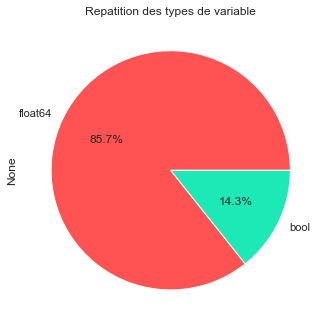

In [110]:
data.dtypes.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Repatition des types de variable')

<b>conclusion</b> : Notre dataframe est contitué  à 87% des vraiable réels et à 14,3% de valeurs booléennes.

In [111]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [112]:
#plt.bar(data.margin_low,data.cases,yerr=data.margin_low)

Text(0.5, 1.0, 'Repartition des erreurs dans le dataframe')

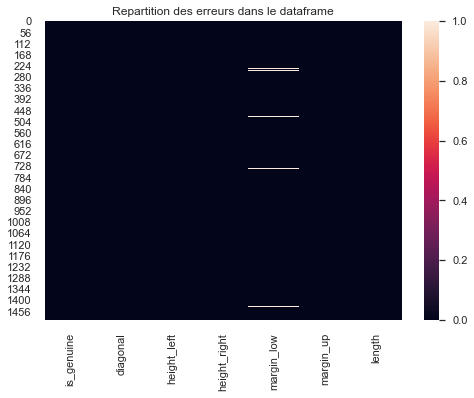

In [113]:
sns.heatmap(data.isna())
plt.title('Repartition des erreurs dans le dataframe')

In [114]:
valeurnull=data[data['margin_low'].isna()]
valeurnull.head(37)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


<b>conclusion</b> : Donc notre Dataframe toutes les colonnes ne contiennent pas de valeurs NAN sauf la colonne 37 valeurs NAN soit un pourcentage de 3,7%

In [115]:
data.duplicated().value_counts()

False    1500
dtype: int64

<b>conclusion</b> : Notre dataframe ne contient pas de valeurs dupliquées

#### Remplacons Les valeurs NAN En utilisant la regression lineaire

In [116]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [117]:
model_reg = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=data).fit()
print(model_reg .summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.60e-202
Time:                        18:04:36   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

<b>Analyse : </b> Toutes les variables sont significative cas leurs Pvalue sont tous inférieurs à 0.05. Puisque Le R2 est de 0,478 et la R2 adjusté est de 0,477 on peut donc utiliser cela a des fins de prediction. 

In [118]:
data_model=data.drop(valeurnull.index,axis=0)
data_model['is_genuine'].replace([True,False],[1,0],inplace=True)
x=data_model.drop(['margin_low','is_genuine'],axis=1)
y=data_model['margin_low']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)

(1170, 5)
(293, 5)


In [119]:
from sklearn.linear_model import LinearRegression 

modelR=LinearRegression()
modelR.fit(xtrain,ytrain)
modelR.score(xtest,ytest)

0.545795668353241

In [120]:
def vision (liste) :
    liste=liste.to_numpy()
    liste=liste.reshape(1,liste.shape[0])
    val=modelR.predict(liste)
    return val

In [121]:
liste_predic=valeurnull.drop(['margin_low','is_genuine'],axis=1)
liste_predic=liste_predic.reset_index(drop=True)

In [122]:
liste_val=valeurnull.index
valeurs=[]
j=0
for i in liste_val:
    data.iloc[i,4]=vision(liste_predic.iloc[j,:])
    j=j+1

In [123]:
data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [124]:
verif=data.iloc[liste_val,:]
verif.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.323133,3.25,112.79
99,True,171.93,104.07,104.18,4.393907,3.14,113.08
151,True,172.07,103.80,104.38,4.416845,3.02,112.93
197,True,171.45,103.66,103.80,4.337374,3.62,113.27
241,True,171.83,104.14,104.06,4.634614,3.02,112.36


#### Taux de mauvais biellets et de billets corrects

In [125]:
data['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

<AxesSubplot:ylabel='is_genuine'>

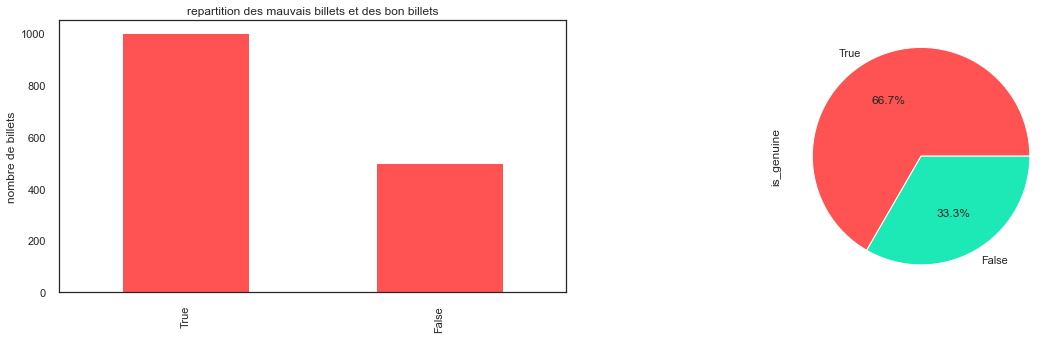

In [126]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
data['is_genuine'].value_counts().plot(kind='bar')
plt.title('repartition des mauvais billets et des bon billets')
plt.ylabel('nombre de billets')
plt.subplot(1,2,2)
data['is_genuine'].value_counts().plot.pie(autopct='%1.1f%%')

<b>conclusion</b> : La colonne is_denuine est constituées à 66,7% de valeurs True et 33,3% de valeurs False

#### Observons d'entre de jeu une simple statistique des variables quantitatives 

In [127]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483432,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659489,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


#### Déterminons la moyenne de chaque variables caractérisant le billets

In [128]:
data.mean()

is_genuine        0.666667
diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.483432
margin_up         3.151473
length          112.678500
dtype: float64

#### Analyse des valeurs aberantes 

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

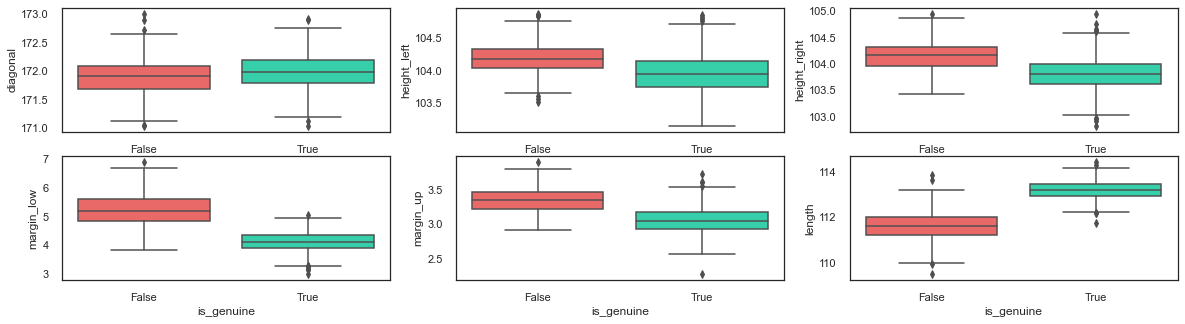

In [129]:
plt.figure(figsize=(20,5))
plt.subplot(2,3,1)
sns.boxplot(data=data,x='is_genuine',y='diagonal')
plt.subplot(2,3,2)
sns.boxplot(data=data,x='is_genuine',y='height_left')
plt.subplot(2,3,3)
sns.boxplot(data=data,x='is_genuine',y='height_right')
plt.subplot(2,3,4)
sns.boxplot(data=data,x='is_genuine',y='margin_low')
plt.subplot(2,3,5)
sns.boxplot(data=data,x='is_genuine',y='margin_up')
plt.subplot(2,3,6)
sns.boxplot(data=data,x='is_genuine',y='length')


<b>conclusion</b> : Nous remarquons qu'ils ya pas de valeurs qui s'éloignent fortement des autres. A partir de ces graphique nous pouvons établir la différence entre les deux types de billets : Nous remarquons que les faux billets ont un margin_low plus grand que les vrai billets et sont relativement plus courte que les bon billets et pour le reste la différence n'est pas significative.

#### Observons les corrélations entre les variables à l'aide d'une courbe avec une table des corrélations

Text(0.5, 1.0, 'corrélation entre les variables')

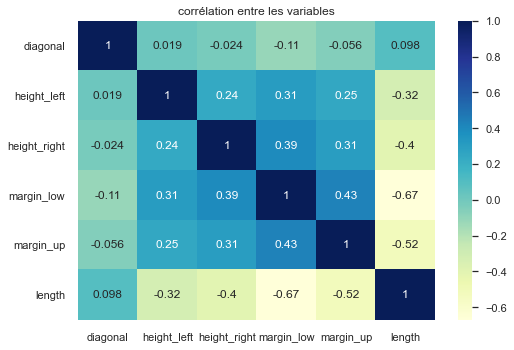

In [130]:
data_corr=data.drop('is_genuine',axis=1)
corr=data_corr.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.title('corrélation entre les variables')

Text(0.5, 1.0, 'corrélation entre la variable is_genuine et les autres variables')

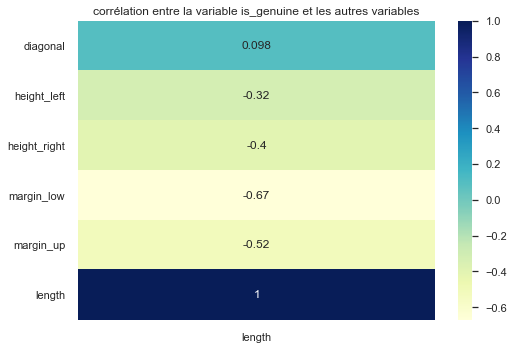

In [131]:
sns.heatmap(corr[['length']],annot=True,cmap='YlGnBu')
plt.title('corrélation entre la variable is_genuine et les autres variables')

<b>conclusion</b> : On remarque que certaines variables sont correlées : la variable margin_low et length sont correlés négativement.

#### Observons les corrélations entre les variables à l'aide d'une courbe avec un pairplot

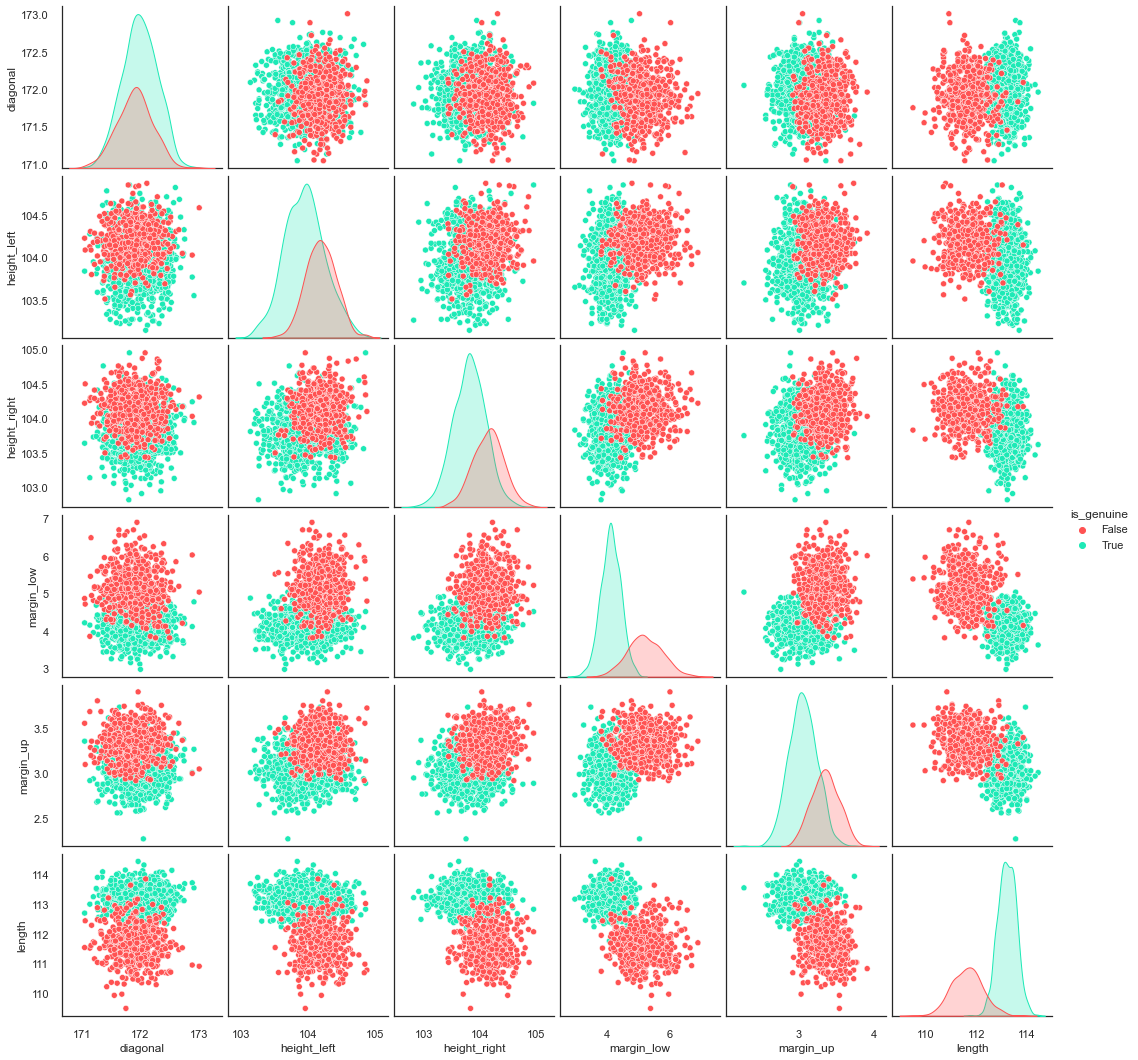

In [132]:
sns.pairplot(data=data,hue='is_genuine')

<b>conclusion</b> : Nous remarqu'on que pour les variables qui permettait d'étabir la différence entre les deux billets les deux groupes sont bien séparé (Length et margin_low) alors que pour d'autres un groupe en partie semble inclu dans l'autre (Diagonale et margin_up).

### <a id="fond">  3-ANALYSE DU FOND </a>

#### Remplacons les valeurs True et False de la variable is_genuine par les nombres 0 et 1

In [133]:
data_prep=data.copy()
data_prep['is_genuine'].replace([True,False],[1,0],inplace=True)
#data_prep.loc(data_prep['is_genuine']=='False','is_genuine')=0
#data_prep.loc(data_prep['is_genuine']=='True','is_genuine')=1
data.drop('is_genuine',axis=1,inplace=True)
data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [134]:
data_prep['is_genuine'].unique()

array([1, 0], dtype=int64)

In [135]:
data_pour_modelisation=data_prep.copy()
data_pour_modelisation.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


### a- Appliquons l'ACP 

#### Normalisons d'abord le dataframe 

In [136]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [137]:
scaler=StandardScaler()
data_normalise=scaler.fit_transform(data)
print(data_normalise[:,3])

[ 0.05546738 -1.08215668 -0.12655247 ...  1.55713115  1.04140824
  0.22231891]


#### Appliquons l'acp au dataframe obtenu et resuisons le jeu de donné à quatre dimensions

In [138]:
model_acp=PCA(n_components=6)
data_reduis=model_acp.fit_transform(data_normalise)
print(data_reduis)

[[ 1.64392431  0.74781179  2.40488217  3.17955868  0.30009096 -0.01016977]
 [-2.0200161  -2.20747731 -1.00162192  0.07368431  0.03397568 -0.47585727]
 [-0.96984437  2.62074549  1.19382161 -0.92500657 -0.83765195  0.2073411 ]
 ...
 [ 1.8898844  -0.60032099 -0.54632847 -0.09799094 -0.29697739  0.50358134]
 [ 1.78999125  0.51111302  0.02793256 -0.47393693  0.35668617  0.52476035]
 [ 1.0421711  -1.47144802  0.48462952 -0.68509726  0.48416896 -0.23484207]]


In [139]:
#pearsonr(data_reduis[:,0],data_reduis[:,1])

In [140]:
#sns.scatterplot(data_reduis[:,0],data_reduis[:,1])

#### Déterminons l'inertie associéé a chaque plan factorielle et constuisons le diagramme de l'ebouli des valeurs propres

In [141]:
model_acp.explained_variance_ratio_

array([0.43285738, 0.16956321, 0.13026209, 0.11825356, 0.09600548,
       0.05305828])

In [142]:
np.sum(model_acp.explained_variance_ratio_)

0.9999999999999999

<b>conclusion  </b> : L'ACP conserve 100% des informations contenu dans les données originales

In [143]:
table_variance=model_acp.explained_variance_ratio_
n_components=6

In [144]:
np.argmax(np.cumsum(table_variance))>1

True

Text(0.5, 1.0, 'Diagramme de l ebouli des valeurs propre')

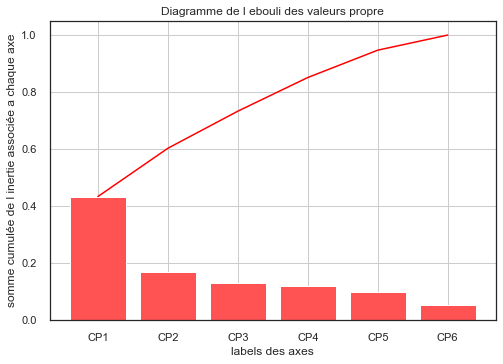

In [145]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6"]
#n=range(1,n_components+1)
sumcum=np.cumsum(table_variance)
plt.bar(list_acp,table_variance)
plt.plot(list_acp,sumcum,c='red')
plt.grid()
plt.xlabel('labels des axes')
plt.ylabel('somme cumulée de l inertie associée a chaque axe')
plt.title('Diagramme de l ebouli des valeurs propre')

<b>conclusion</b> : Nous remarquons que le premier plan factoriel contient 43,19081% des informtions, le second 16,959065% , le troisièmes 13,021782%, le quatrième 11,822211%, le cinquième 09,673165% et le sixième 05,332967%.

#### Affichons les formules de calcule des composantes

In [146]:
model_acp.components_

array([[-0.08463599,  0.33058769,  0.39355814,  0.50765802,  0.43950097,
        -0.52705099],
       [ 0.94131711,  0.30753107,  0.10826829, -0.07230943, -0.00509509,
         0.0486837 ],
       [-0.28804864,  0.88510954, -0.16279569, -0.10980683, -0.26986876,
         0.14906363],
       [-0.10185633, -0.04973678,  0.86682302, -0.08971479, -0.44347622,
         0.17620864],
       [-0.11552851,  0.10100214,  0.23559231, -0.56403514,  0.71243164,
         0.30863168],
       [ 0.00807956,  0.00650752,  0.00128101,  0.63151623,  0.17249289,
         0.7558599 ]])

In [147]:
composantes=pd.DataFrame(model_acp.components_)

In [148]:
composantes.columns=data.columns
composantes.index=['F1','F2','F3','F4','F5','F6']

In [149]:
composantes.head(6)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.084636,0.330588,0.393558,0.507658,0.439501,-0.527051
F2,0.941317,0.307531,0.108268,-0.072309,-0.005095,0.048684
F3,-0.288049,0.885110,-0.162796,-0.109807,-0.269869,0.149064
F4,-0.101856,-0.049737,0.866823,-0.089715,-0.443476,0.176209
F5,-0.115529,0.101002,0.235592,-0.564035,0.712432,0.308632
F6,0.008080,0.006508,0.001281,0.631516,0.172493,0.755860


#### Regardons les corrélations entre les variables et ces composantes principales ou le niveau d'influence de chaque variable sur chaque axe factoriel

Text(0.5, 1.0, 'corrélation entre les variables et chaque axe')

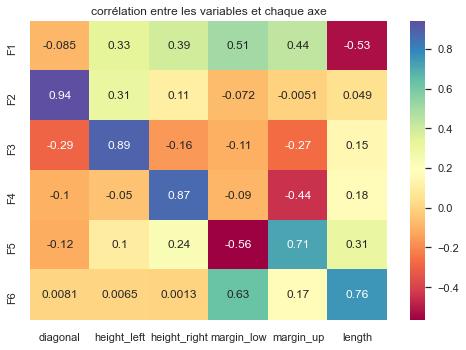

In [150]:
sns.heatmap(composantes,annot=True,cmap='Spectral')
plt.title('corrélation entre les variables et chaque axe')

<b>conclusion</b> : 
- Le 6e plan factoriel est correlé avec la variable length et margin_low
- Le 5e plan factoriel est correlé avec la variable margin_up et négativement avec la variable margin_low.
- LE 4e plan factoriel est correlé avec la variable heiht_right.  
- Le 3e plan factoriel est correlé avec la variable height_left.  
- Le 2e plan factorielle est fortement correlé avec la variable diagonale
- Le 1er plan factorielle est correlé avec la variable margin_low et correlé nagarivement avec la variable length

#### Construisons le cercle de corrélation 

Comme les deux premier plan factoriel conserve 60% des informations alors nous pouvons faire notre analyse sur les deux premiers plan factoriel

Text(0.5, 1.0, 'Cercle de corrélation')

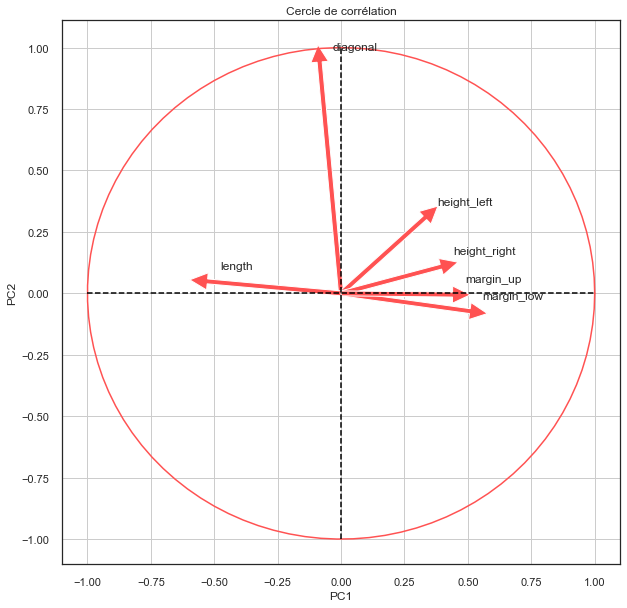

In [151]:
liste_nom=[]
liste_nom=composantes.columns
#Construction du cercle
fig=plt.figure(figsize=(10,10))
x=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(x),np.sin(x))
#Construction des axes
plt.plot([-1,1],[0,0],ls='--',c='black')
plt.plot([0,0],[-1,1],ls='--',c='black')
# Construction des fleches représentant les variables
for i in range(0,composantes.shape[1]):
    plt.arrow(0,0,composantes.iloc[0,i],composantes.iloc[1,i],head_width=0.07,head_length=0.07,width=0.02, )
    plt.text(composantes.iloc[0,i]+0.05,composantes.iloc[1,i]+0.05,liste_nom[i])
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation')

<b>conclusion  </b> : -Nous remarquons que les deux variables height_left et height_right sont très correlées je vais donc supprimer l'une d'elle avant d'appliquer mon model de classification.  
-Les variables margin_up et margin_low sont corrélés mais comme la variable margin_up n'est pas bien représentée j'ai decidé de ne pas les supprimer  

#### Analyse de la qualité de la représentation de chaque variable dans le 1er plan factoriel

<b>conclusion  </b> : Les variables length, diagonal, height_left et margin_low sont bien représentées tandis que les variables margin_up et height_right ne sont pas bien représentées sur le premier plan factoriel

#### Analyse de la qualité de la contribution aux axes

<b>conclusion  </b> : La variable diagonal contribue fortement sur F2, les variable margin_up;margin_low  contribue fortement a l'axe F1 et la variable length contribue négativement sur la variable F1.

#### Projection des individus sur le plan factoriel   

Text(0.5, 1.0, 'Projection des individu des individus sur le plan factoriel')

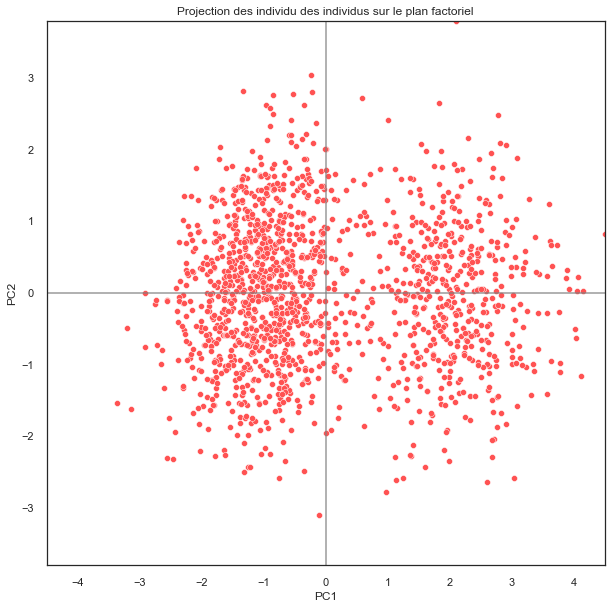

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x_max=data_reduis[:,0].max()
y_max=data_reduis[:,1].max()

sns.scatterplot(data_reduis[:,0],data_reduis[:,1])

plt.plot([-x_max,x_max],[0,0],c='gray',alpha=0.8)
plt.plot([0,0],[-y_max,y_max],c='gray',alpha=0.8)

ax.set_xlim(left=-x_max,right=x_max)
ax.set_ylim(bottom=-y_max,top=y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individu des individus sur le plan factoriel')

<b>conclusion</b> : Nous Pouvons distinguer deux groupes : Le groupe des bon billets a gauche et celui des faux billets à droite. Puisque dans l'analyse de la forme nous avons vu que les faux billets ont un margin_low un peu plus grand aux bon billets et à partir du cercle de correlation comme la variable margin_low est correlé  avec le premier plan factoriel donc  le groupe des bon billets est à gauche et celui des faux billets à droite. 

Text(0.5, 1.0, 'Projection des individu des individus sur le plan factoriel')

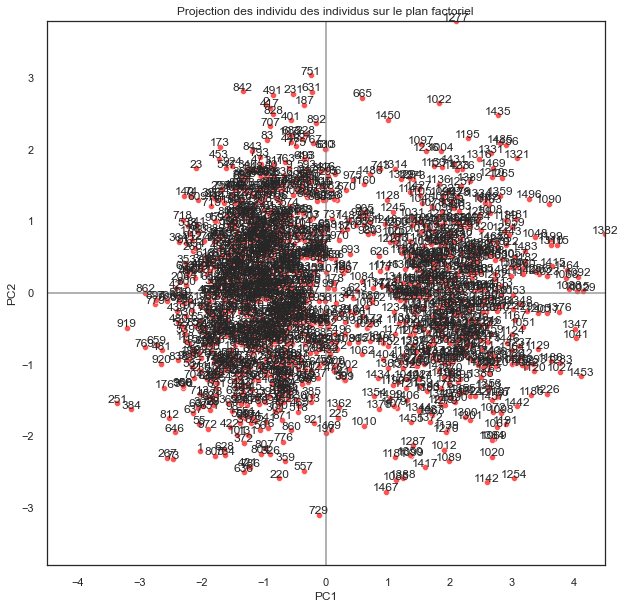

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x_max=data_reduis[:,0].max()
y_max=data_reduis[:,1].max()

sns.scatterplot(data_reduis[:,0],data_reduis[:,1])

plt.plot([-x_max,x_max],[0,0],c='gray',alpha=0.8)
plt.plot([0,0],[-y_max,y_max],c='gray',alpha=0.8)

ax.set_xlim(left=-x_max,right=x_max)
ax.set_ylim(bottom=-y_max,top=y_max)

labels=data.index
for i in range(0,data_reduis.shape[0]) :
            plt.text(data_reduis[i,0],data_reduis[i,1]+0.05, labels[i], ha='center',va='center') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individu des individus sur le plan factoriel')

In [154]:
data_prep.insert(7,'var_reduis1',data_reduis[:,0])

In [155]:
data_prep.insert(8,'var_reduis2',data_reduis[:,1])

In [156]:
data_prep.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,var_reduis1,var_reduis2
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.643924,0.747812
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.020016,-2.207477
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969844,2.620745
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.377681,-1.818425
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.148728,-0.566928


### Segmentons les individus en clusters

#### Déterminons avec la méthode des coude le nombre optimal de clusters

Text(0.5, 1.0, 'courbe Methode des coudes')

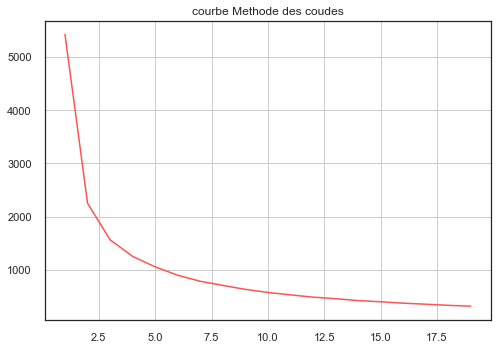

In [157]:
from sklearn.cluster import KMeans
donnr=data_reduis[:,[0,1]]
cout=[]
n=range(1,20)
for i in n :
    model=KMeans(n_clusters=i).fit(donnr)
    cout.append(model.inertia_)
plt.plot(n,cout)
plt.grid()
plt.title('courbe Methode des coudes')

Calcul du coefficient de silhouette

In [158]:
from sklearn.metrics import silhouette_score
for i in range(2,6):
    model_score=KMeans(n_clusters=i)
    model_score.fit(donnr)
    model_score.labels_
    score = silhouette_score(donnr, model_score.labels_, metric='euclidean')
    print("Le score pour",i,"clusters est :",score)

Le score pour 2 clusters est : 0.5371891621941901
Le score pour 3 clusters est : 0.4223829749453784
Le score pour 4 clusters est : 0.3714805546495712
Le score pour 5 clusters est : 0.34934380765222733


<b>conclusion</b> : La méthode des coudes nous donne 2 clusters donc par la suite je vais classer en 2 clusters

#### Utilisation de la bibliothèque Yellowbrick

Elbow Method

In [159]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

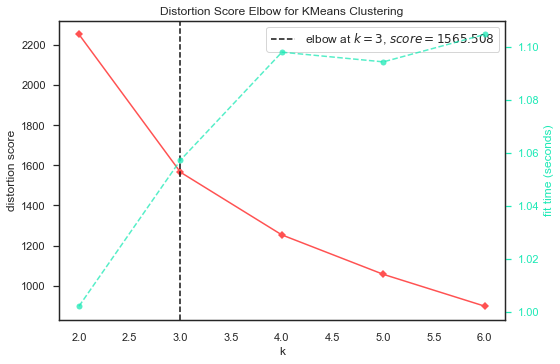

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [160]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7))

visualizer.fit(donnr)    
visualizer.poof() 

Silhouette Visualizer

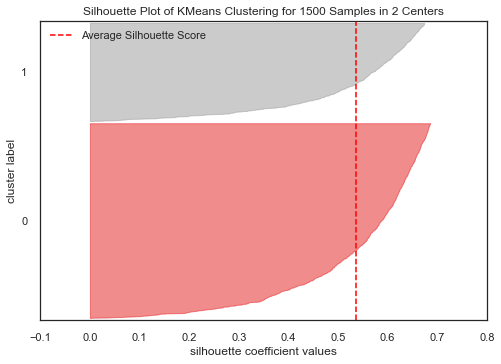

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1500 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [161]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(donnr)    
visualizer.poof()

####  Entrainons le model de classification Kmean

In [162]:
model_clusters=KMeans(n_clusters=2)
model_clusters.fit(donnr)

KMeans(n_clusters=2)

In [163]:
model_clusters.inertia_

2251.856539045457

In [164]:
centroide=model_clusters.cluster_centers_
centroide

array([[ 2.0455575 , -0.06673748],
       [-1.03201146,  0.03366996]])

#### Visualisons nos deux clusters obtenu avec leur centroide

Text(0.5, 1.0, 'Regroupements des variables en deux clusters')

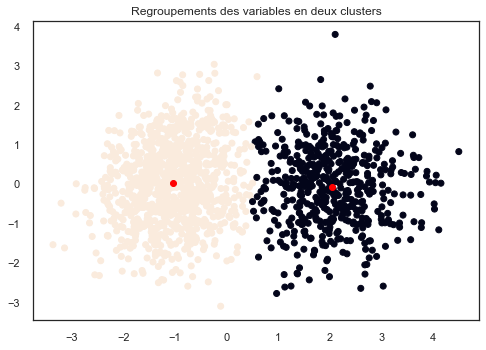

In [165]:
clusters=model_clusters.predict(donnr)
plt.scatter(donnr[:,0],donnr[:,1],c=clusters)
plt.scatter(centroide[:,0],centroide[:,1],c='red')
plt.title('Regroupements des variables en deux clusters')

 <b>conclusion</b> : Graphiquement on remarque la formation de deux groupes bien séparés et leurs centroides sont bien distant.

#### Affichons les deux clusters obtenu et insérons les dans le dataframe de départ

In [166]:
clusters

array([0, 1, 1, ..., 0, 0, 0])

In [167]:
data_prep.insert(9,'cluster',clusters)

In [168]:
data_prep.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,var_reduis1,var_reduis2,cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1.643924,0.747812,0
1,1,171.46,103.36,103.66,3.77,2.99,113.09,-2.020016,-2.207477,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,-0.969844,2.620745,1
3,1,171.36,103.91,103.94,3.62,3.01,113.51,-1.377681,-1.818425,1
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0.148728,-0.566928,1


<b>conclusion</b> : Nous remarquons que les clusters obtenu coincide presque avec les informations réelles. Donc le model a su bien classer les billets en deux bloc(vrai billet et faux billet).

Text(0.5, 1.0, 'Matrice de confusion de Kmean')

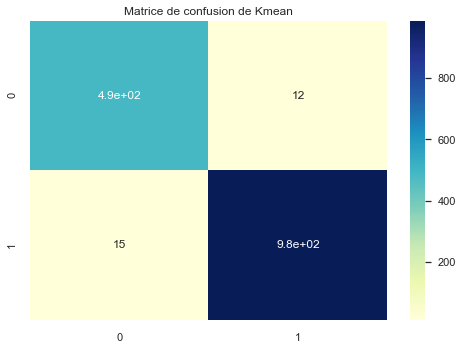

In [169]:
from sklearn.metrics import confusion_matrix
matrix_confu_kmean=confusion_matrix(y_true=data_prep['is_genuine'],y_pred=data_prep['cluster'])
sns.heatmap(matrix_confu_kmean,annot=True,cmap='YlGnBu')
plt.title('Matrice de confusion de Kmean')

<b>conclusion</b> : Nous remarqu'on qu'il ya 30 billets qui ont été mal classé. Donc notre algorithme de Kmean a une performence de 98,06%

### c - Model capable de prédire la nature d'un billet

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from scipy.stats import pearsonr

In [171]:
y=data_pour_modelisation['is_genuine']
x=data_pour_modelisation.drop(['is_genuine'],axis=1)

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.20)

In [173]:
print(y_test.shape)

(300,)


#### Pipeline avec Le grandientboosting

In [220]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [221]:
pipe =make_pipeline(MinMaxScaler(), GradientBoostingClassifier())

In [222]:
param_boost={'n_estimators':[100,300],'max_features':['sqrt','log2'],'max_depth':np.arange(1,8),
             'criterion':['mae','friedman_mse']}

In [223]:
#grid = GridSearchCV(pipe,param_boost, cv=5)
#grid.fit(x_train,y_train)
#print("Best params:\n{}\n".format(grid.best_params_))
#print("Best cross-validation score: {:.2f}".format(grid.best_score_))
#print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

#### Model des forets aléatoire

In [174]:
param_rand={'n_estimators':[200,500],'max_features':['auto','sqrt','log2'],'max_depth':np.arange(1,8),'criterion':['gini','entropy']}
gridR=GridSearchCV(RandomForestClassifier(),param_rand,cv=5)
gridR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [175]:
print('meilleur paramètre',gridR.best_params_)
print('Meilleur estimateur',gridR.best_estimator_)

meilleur paramètre {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
Meilleur estimateur RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=200)


In [176]:
model=RandomForestClassifier(criterion= 'gini', max_depth= 2, max_features= 'auto', n_estimators= 200)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.98

<b>conclusion</b> : Donc notre model de Foret aleatoire est capable de présire la nature du billet avec un niveau de confiance de 98,66%

#### Model avec les Kvoisins

In [177]:
n=np.arange(1,20)
param_optimal={'n_neighbors':n,'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_optimal,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [178]:
print('meilleur paramètre',grid.best_params_)
print('Meilleur estimateur',grid.best_estimator_)

meilleur paramètre {'metric': 'manhattan', 'n_neighbors': 7}
Meilleur estimateur KNeighborsClassifier(metric='manhattan', n_neighbors=7)


In [179]:
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.99

<b>conclusion</b> : Donc notre model avec le K voisins est capable de présire la nature du billet avec un niveau de confiance de 99%.

#### Model en utilisant les grandientboostingClassier

In [181]:
param_boost={'n_estimators':[100,300],'max_features':['sqrt','log2'],'max_depth':np.arange(1,8),'criterion':['mae','friedman_mse']}
gridB=GridSearchCV(GradientBoostingClassifier(),param_boost,cv=5,n_jobs=-1)
gridB.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'friedman_mse'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300]})

In [182]:
print('meilleur paramètre',gridB.best_params_)
print('Meilleur estimateur',gridB.best_estimator_)

meilleur paramètre {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
Meilleur estimateur GradientBoostingClassifier(max_features='sqrt')


In [183]:
modelgb= GradientBoostingClassifier(max_depth=2,n_estimators=100,max_features='log2')
modelgb.fit(x_train,y_train)
modelgb.score(x_test,y_test)

0.9866666666666667

<b>conclusion</b> : Donc notre model avec le GradientBoostingClassifier est capable de présire la nature du billet avec un niveau de confiance de 99%

#### Analyse de la performence de notre model de Gradientboosting : Courbe de validation, courbe d'apprentissage et la classification report

In [184]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

###### Validation curve : Pour déterminer s'il ya une situation d'overfitting

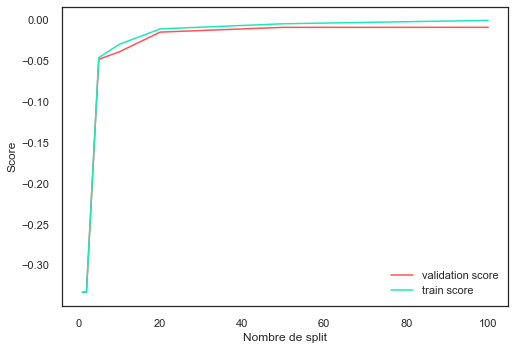

In [185]:
#k=np.arange(1,300)
param_range = [1, 2, 5, 10, 20, 50, 100]
train_score,val_score=validation_curve(modelgb,x_train,y_train,param_name="n_estimators", param_range=param_range,
    scoring="neg_mean_absolute_error",n_jobs=2)
plt.plot(param_range,val_score.mean(axis=1),label='validation score')
plt.plot(param_range,train_score.mean(axis=1),label='train score')
plt.xlabel("Nombre de split")
plt.ylabel('Score')
plt.legend()

<b>conclusion</b> : D"après la validation curve il ya pas situation d'overfitting parceque le model a un bon score sur le train_set et sur le test_set.

###### La courbe d'apprentissage: Pour savoir si le model peut avoir de meilleur performence avec plus de données

[192 277 362 448 533 618 704 789 874 960]


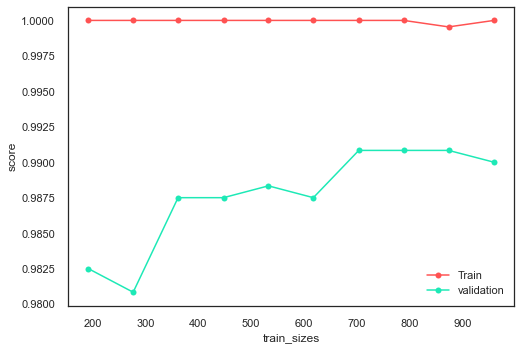

In [186]:
N,train_score,val_score=learning_curve(modelgb,x_train,y_train,train_sizes=np.linspace(0.2,1.0,10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='Train',marker='o')
plt.plot(N,val_score.mean(axis=1),label='validation',marker='o')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.legend()

<b>conclusion</b> : On remarque que a partir de 800 données la performence du model n'augmente plus. Donc il y aura aucun intéret a chercher plus de données.

#### Classification report 

In [187]:
print(classification_report(y_test, y_pred=modelgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



##### Testons notre model sur un exemple.

In [188]:
def predire_test (liste) :
    liste=liste.reshape(1,liste.shape[0])
    bool=modelgb.predict(liste)
    print(bool)
    if (bool==0): 
        print('Attention C\'est un faux billet')
    else :
        print('ce billet est correct')

In [189]:
test1=np.array([20,20,0,4,3,13])
predire_test(test1)

[1]
ce billet est correct


#### Analysons la performence de notre model avec la courbe de ROC et la matrice de corrélation

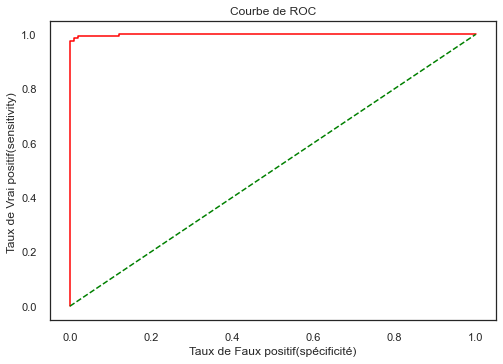

In [190]:
from sklearn.metrics import roc_curve
proba=modelgb.predict_proba(x_test)[:,1]
a,b,t=roc_curve(y_test,proba)
plt.plot(a,b,c='red')
aa=np.linspace(0,1,10)
bb=aa
plt.plot(aa,bb,c='green',linestyle='--')
plt.title('Courbe de ROC')
plt.xlabel('Taux de Faux positif(spécificité)')
plt.ylabel('Taux de Vrai positif(sensitivity) ')
plt.show()

<b>conclusion</b> : Notre Model est presque parfait donc a  une   très bonne performence puisque la courbe de ROC est très éloigné de la première bissectrice.

Text(0.5, 1.0, 'Matrice de confusion du model de classification')

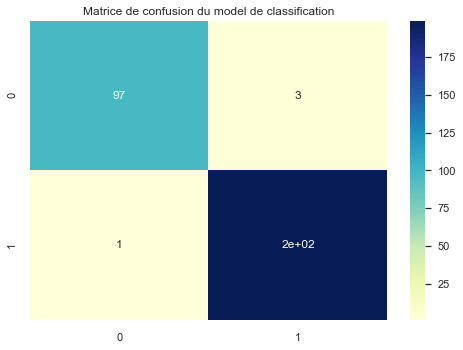

In [191]:
matrix_confu=confusion_matrix(y_true=y_test,y_pred=modelgb.predict(x_test))
sns.heatmap(matrix_confu,annot=True,cmap='YlGnBu')
plt.title('Matrice de confusion du model de classification')

In [192]:
100-(3/x_test.shape[0])*100

99.0

<b>conclusion</b> : D'après la matrice de confusion on a 98 vrai positifs, 2 Faux positif, 1 faux negatif et 199 vrai négatif. Donc notre model a prédit correctemment presque toutes les valeurs du dataframe de test sauf 3 cas ou il s'est trompé soit une précision de 99% (Sur 300 valeurs prédite 297 sont correctes et 3 sont incorrects).

<b>Etude comparative Kmean et model grandientboosting</b> Le Kmean a une perfomence de 98% alors que le grandientboosting a un score de 99% donc le model de gradientboosting est plus éfficace.

### Application : testons notre model sur d'autre billets.

In [193]:
exemple=pd.read_excel('exemple.xlsx')
exemple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


In [194]:
exemple.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [195]:
exemple_clone=exemple.drop(['id'],axis=1)
exemple_clone.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [196]:
result=modelgb.predict_proba(exemple_clone)
result

array([[9.98639587e-01, 1.36041256e-03],
       [9.99581182e-01, 4.18818367e-04],
       [9.99613421e-01, 3.86578746e-04],
       [8.36977433e-03, 9.91630226e-01],
       [5.02515210e-04, 9.99497485e-01]])

In [197]:
def predire2 (liste) :
    liste=liste.to_numpy()
    liste=liste.reshape(1,liste.shape[0])
    bool=modelgb.predict(liste)
    if (bool==0): 
        print(0)
    else :
        print(1)

In [198]:
def prediction (ligne) : 
    result=predire2(ligne)
    return result

#### Prediction de la nature de ces billets

In [199]:
#result=exemple_clone.apply(prediction)
fiche=[]
for i in range(0,exemple_clone.shape[0]):
    fiche.append(predire2(exemple_clone.iloc[i,:]))

0
0
0
1
1


In [200]:
table_de_resultat=pd.DataFrame(['Faux','Faux','Faux','vrai','vrai'],columns=['resultat test'],copy=True)

In [201]:
exemple.insert(7,'resultat test',table_de_resultat)
exemple

,diagonal,height_left,height_right,margin_low,margin_up,length,id,resultat test
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,vrai
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,vrai


#### Probabilité de chaque prediction

In [202]:
def prediction_proba (liste) :
    liste=liste.to_numpy()
    liste=liste.reshape(1,liste.shape[0])
    bool=modelgb.predict_proba(liste)[0,1]
    return bool

In [203]:
#result_proba=exemple_clone.apply(prediction_proba)
#result_proba

fichep=[]
for i in range(0,exemple_clone.shape[0]):
    fichep.append(prediction_proba(exemple_clone.iloc[i,:]))

In [204]:
fichep

[0.0013604125565058803,
 0.0004188183672766656,
 0.0003865787460539022,
 0.99163022566524,
 0.9994974847902802]

In [205]:
table_de_resultat_proba=pd.DataFrame([0.000887529,0.00036277,0.0003344698,0.99237349,0.9995488],columns=['probabilite test'],copy=True)
exemple.insert(8,'probabilite test',table_de_resultat_proba)

#### Affichons le datframe de l'exemple pour visualiser les prédiction de model avec leur probabilité

<a id='r'>Resultat</a>

In [206]:
exemple

,diagonal,height_left,height_right,margin_low,margin_up,length,id,resultat test,probabilite test
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,Faux,0.000888
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,Faux,0.000363
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,Faux,0.000334
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,vrai,0.992373
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,vrai,0.999549
